In [190]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_tabular
import shap
import xgboost as xgb

In [191]:
excel_file = "Bcancer.csv"
sheet_name = "Bcancer"
df = pd.read_csv(excel_file)
column_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [192]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [193]:
df.isnull().sum()

 Clump Thickness               0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
 Marginal Adhesion             0
Single Epithelial Cell Size    0
 Bare Nuclei                   0
Bland Chromatin                0
 Normal Nucleoli               0
 Mitoses                       0
Class                          0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0    Clump Thickness             683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3    Marginal Adhesion           683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5    Bare Nuclei                 683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7    Normal Nucleoli             683 non-null    int64
 8    Mitoses                     683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [195]:
df.columns

Index([' Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', ' Marginal Adhesion',
       'Single Epithelial Cell Size', ' Bare Nuclei', 'Bland Chromatin',
       ' Normal Nucleoli', ' Mitoses', 'Class'],
      dtype='object')

In [196]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

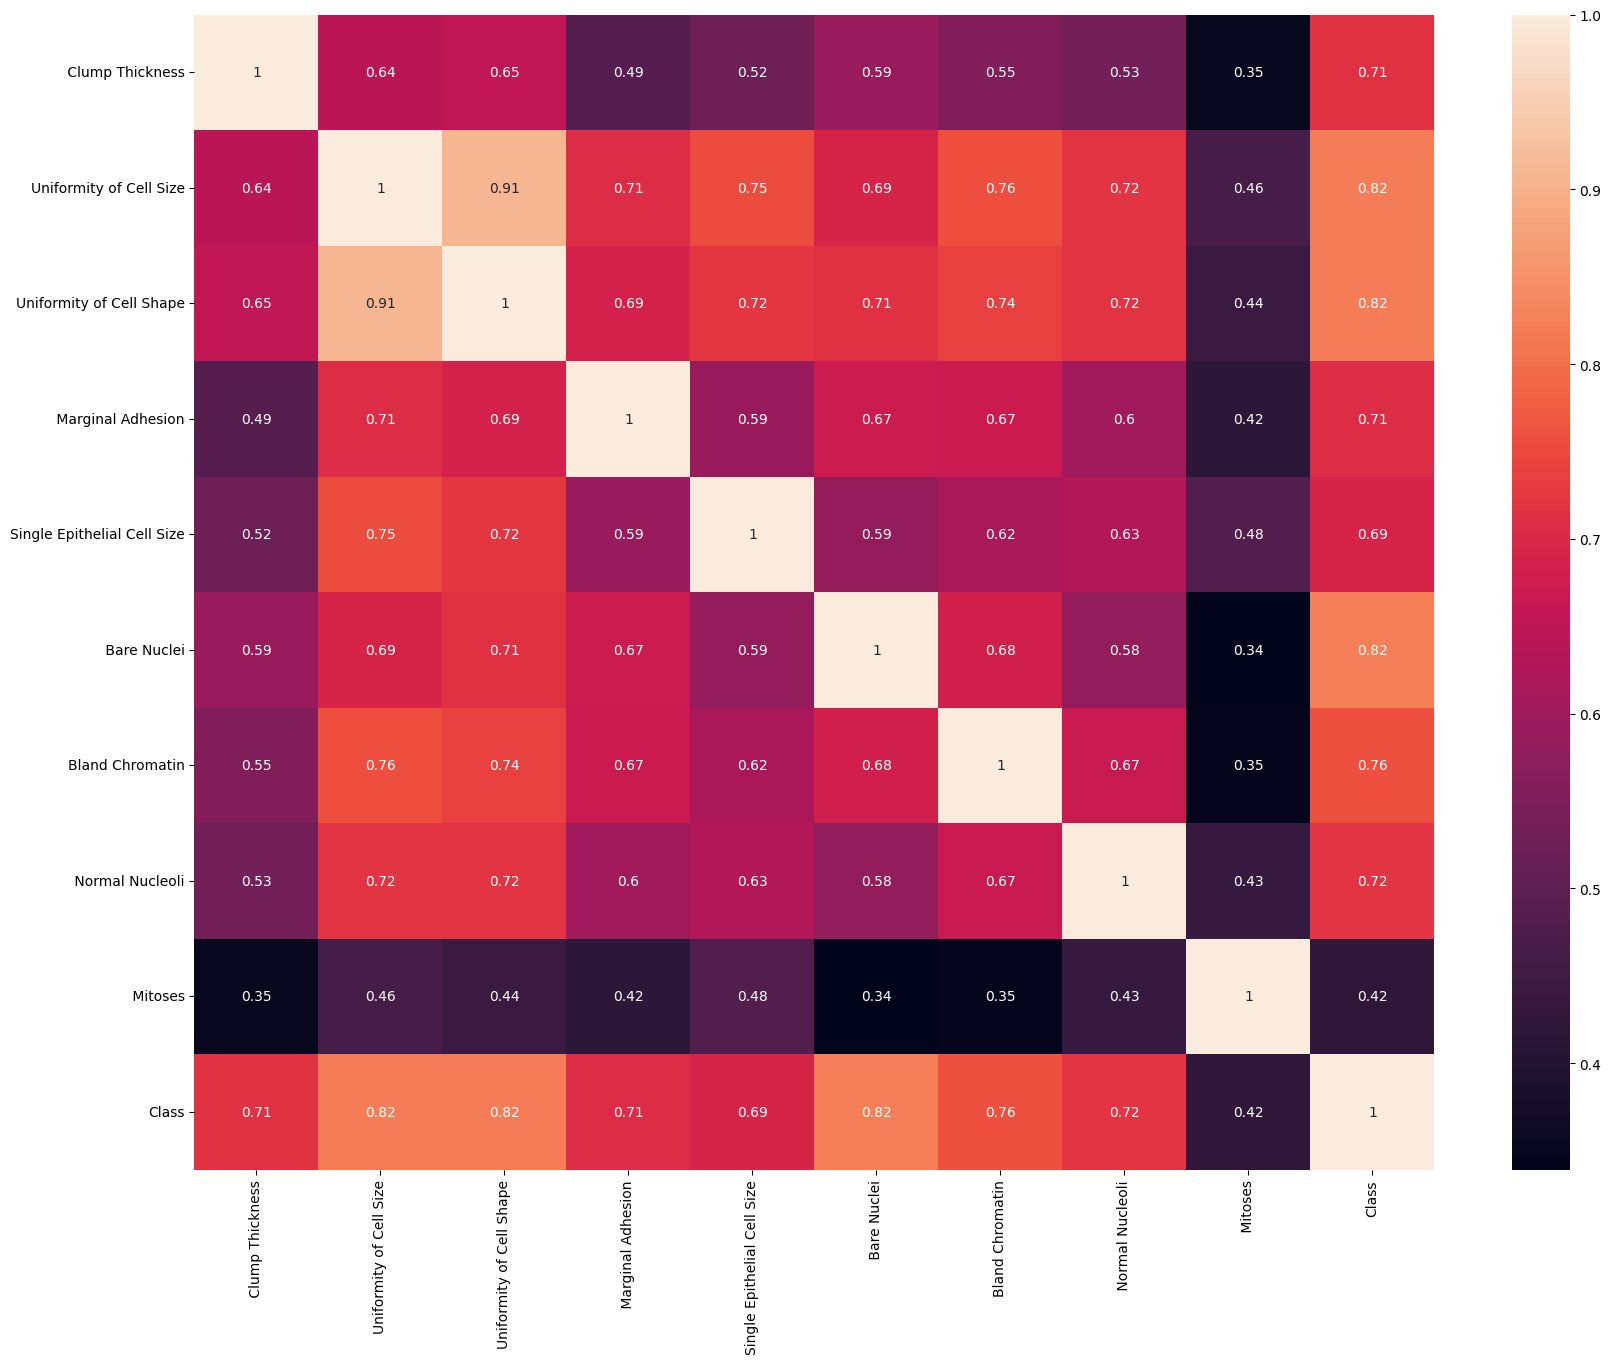

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
correlationmatrix = df.copy()
fig = plt.figure(figsize=(20,15))
sns.heatmap(correlationmatrix.corr(), annot = True)
plt.show()

<Axes: >

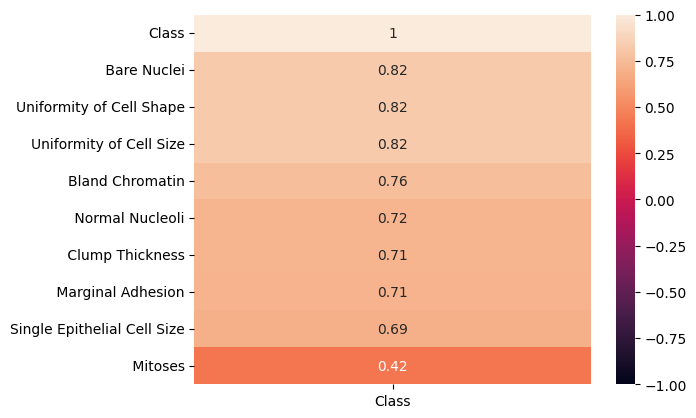

In [198]:
sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True)

In [199]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [200]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [201]:
X = df.drop('Class', axis=1)
y = df['Class']

In [202]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# Training machine learning models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

In [205]:
# Evaluating the performance of each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")


Random Forest Accuracy: 0.9562043795620438
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Logistic Regression Accuracy: 0.9562043795620438
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

SVM Accuracy: 0.9708029197080292
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
     

In [206]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Create a 10-fold cross-validation iterator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the scoring metrics you want to use
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform 10-fold cross-validation for each scoring metric
for metric in scoring_metrics:
    cross_val_results = cross_val_score(rf, X, y, cv=kf, scoring=metric)
    print(metric)
    print(cross_val_results)
    print(f"Cross-Validation {metric.capitalize()}: %0.2f (+/- %0.2f)" % (cross_val_results.mean(), cross_val_results.std() * 2))
    print()

accuracy
[0.98550725 0.97101449 0.97101449 1.         0.97058824 0.95588235
 0.95588235 1.         0.95588235 0.97058824]
Cross-Validation Accuracy: 0.97 (+/- 0.03)

precision_macro
[0.97560976 0.95767196 0.96577381 0.98958333 0.98       0.94
 0.94174265 0.97826087 0.9469697  0.96964286]
Cross-Validation Precision_macro: 0.96 (+/- 0.03)

recall_macro
[1.         0.95209059 0.96577381 1.         0.96780303 0.9673913
 0.95416667 1.         0.95603865 0.95178571]
Cross-Validation Recall_macro: 0.97 (+/- 0.04)

f1_macro
[1.         0.95465498 0.96577381 0.98254172 0.96780303 0.95123117
 0.94762516 1.         0.95123117 0.95420875]
Cross-Validation F1_macro: 0.97 (+/- 0.04)



In [207]:
# Using LIME for explainable AI
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=column_names[:-1], class_names=['Benign', 'Malignant'], discretize_continuous=True)

# Choosing a sample for explanation
idx = 0  # Choose any index
exp = explainer.explain_instance(X_test_scaled[idx], models['Random Forest'].predict_proba, num_features=len(column_names)-1)

# Displaying the explanation
exp.show_in_notebook(show_table=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE')

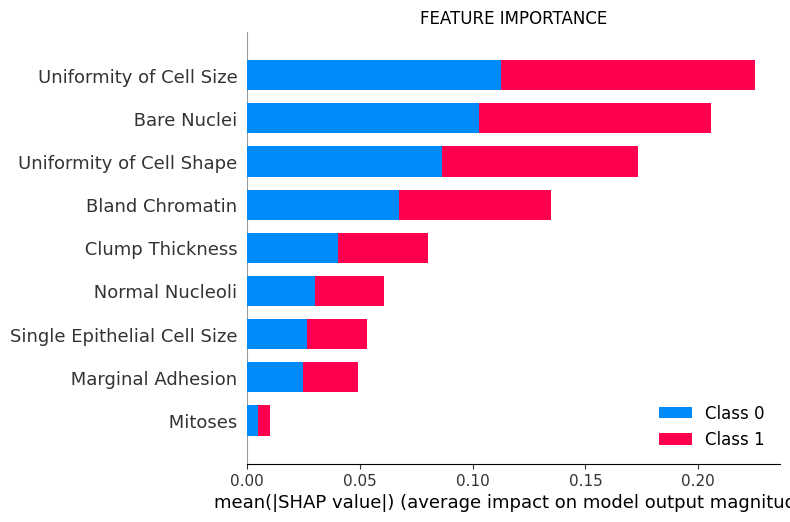

In [208]:
import shap

shap_explainer = shap.TreeExplainer(rf)
shap_values = shap_explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=df.columns, plot_type="bar", show=False) # plot_type='bar' is supported for multi-output explanations!
plt.title("FEATURE IMPORTANCE")

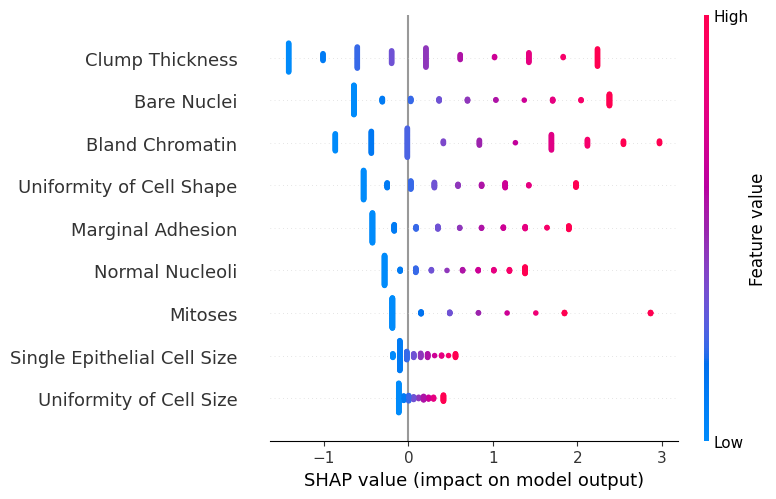

In [209]:
# Using SHAP for explainable AI
explainer_shap = shap.Explainer(models['Logistic Regression'], X_train_scaled)
shap_values = explainer_shap(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=column_names[:-1])

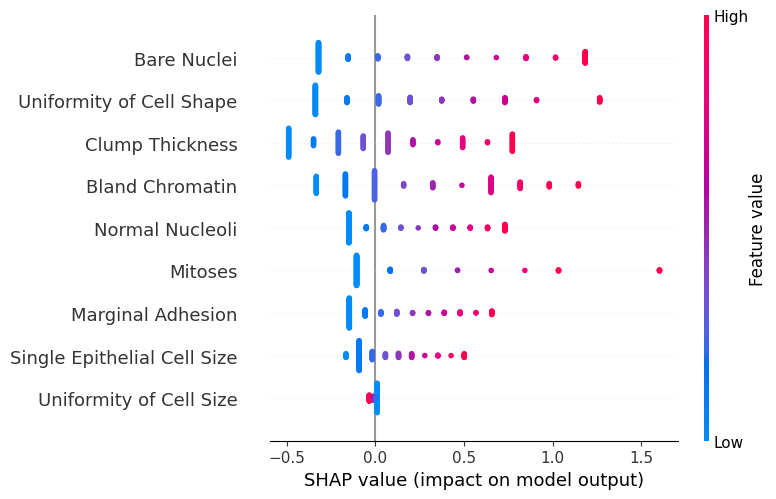

In [210]:
# Using SHAP for explainable AI
explainer_shap = shap.Explainer(models['SVM'], X_train_scaled)
shap_values = explainer_shap(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=column_names[:-1])

GRAPHICAL COMPARISON

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Model': ['Random Forest', 'SVM', 'XGBoost', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting', 'Logistic Regression'],
    
    'Lung Cancer Accuracy': [1, 1, 1, 0.9, 1, 1, 1],
    'Breast Cancer Accuracy': [0.96, 0.97, 0.94, 0.96, 0.93, 0.95, 0.96],
    
    'Lung Cancer Precision_1': [1, 1, 1, 0.87, 1, 1, 1],
    'Lung Cancer Precision_2': [1, 1, 1, 0.85, 1, 1, 1],
    'Breast Cancer Precision': [0.98, 0.98, 0.96, 0.95, 0.96, 0.96, 0.98],
    
    'Lung Cancer Recall_1': [1, 1, 1, 0.82, 1, 1, 1],
    'Lung Cancer Recall_2': [1, 1, 1, 0.97, 1, 1, 1],
    'Breast Cancer Recall': [0.91, 0.95, 0.90, 0.95, 0.88, 0.91, 0.91],
    
    'Lung Cancer F1-score_1': [1, 1, 1, 0.84, 1, 1, 1],
    'Lung Cancer F1-score_2': [1, 1, 1, 0.91, 1, 1, 1],
    'Breast Cancer F1-score': [0.95, 0.96, 0.93, 0.95, 0.92, 0.94, 0.95]
}

df = pd.DataFrame(data)# Sort DataFrame by 'Model'

# Sort DataFrame by 'Model'
df.sort_values(by='Model', inplace=True)

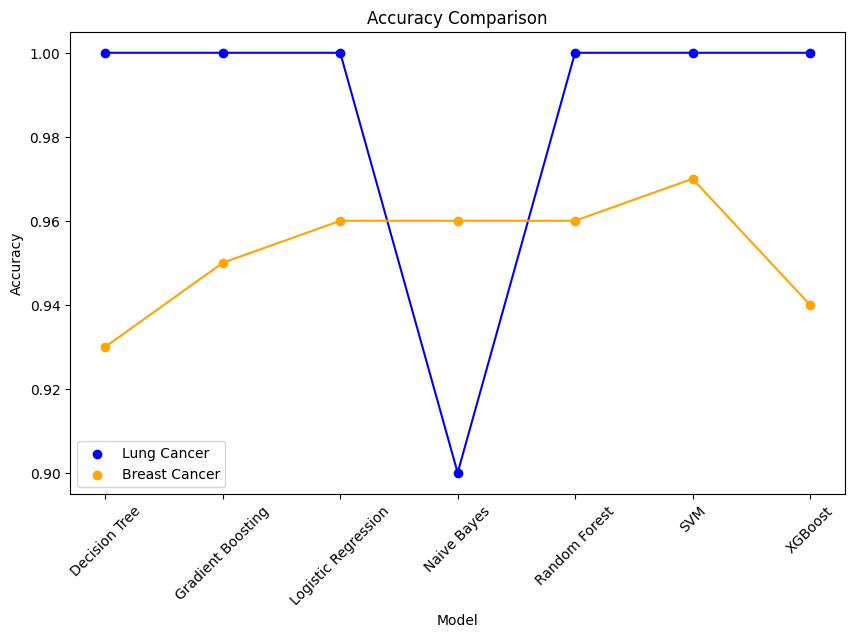

In [212]:
# Scatter plot for accuracy
plt.figure(figsize=(10, 6))
plt.scatter(df['Model'], df['Lung Cancer Accuracy'], color='blue', label='Lung Cancer')
plt.scatter(df['Model'], df['Breast Cancer Accuracy'], color='orange', label='Breast Cancer')
plt.plot(df['Model'], df['Lung Cancer Accuracy'], color='blue')
plt.plot(df['Model'], df['Breast Cancer Accuracy'], color='orange')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()

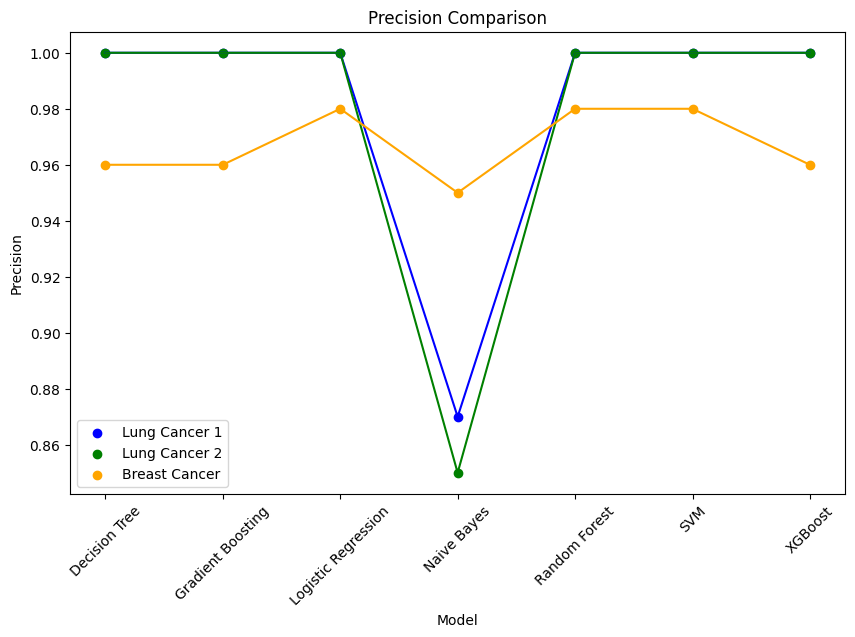

In [213]:
# Scatter plot for precision
plt.figure(figsize=(10, 6))
plt.scatter(df['Model'], df['Lung Cancer Precision_1'], color='blue', label='Lung Cancer 1')
plt.scatter(df['Model'], df['Lung Cancer Precision_2'], color='green', label='Lung Cancer 2')
plt.scatter(df['Model'], df['Breast Cancer Precision'], color='orange', label='Breast Cancer')
plt.plot(df['Model'], df['Lung Cancer Precision_1'], color='blue')
plt.plot(df['Model'], df['Lung Cancer Precision_2'], color='green')
plt.plot(df['Model'], df['Breast Cancer Precision'], color='orange')
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.legend()
plt.show()

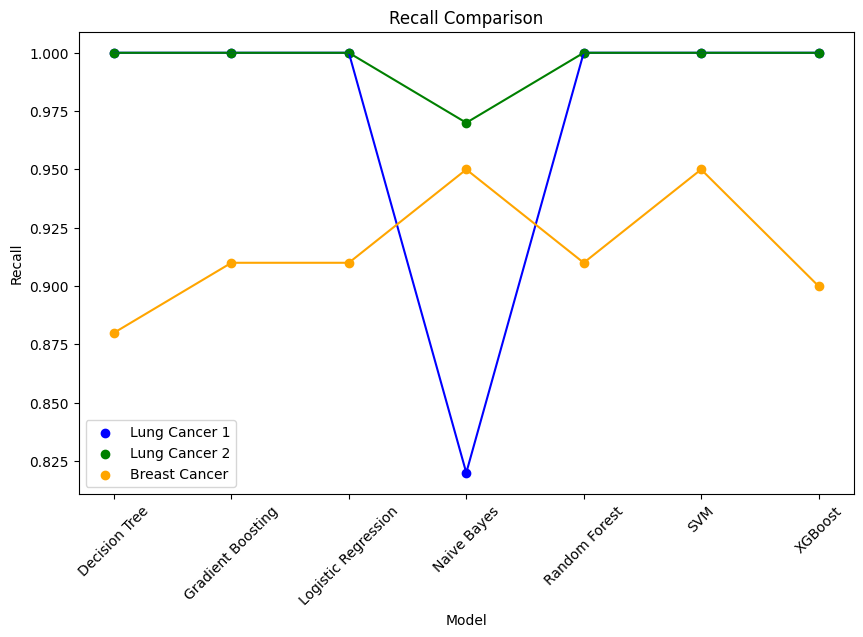

In [214]:
# Scatter plot for recall
plt.figure(figsize=(10, 6))
plt.scatter(df['Model'], df['Lung Cancer Recall_1'], color='blue', label='Lung Cancer 1')
plt.scatter(df['Model'], df['Lung Cancer Recall_2'], color='green', label='Lung Cancer 2')
plt.scatter(df['Model'], df['Breast Cancer Recall'], color='orange', label='Breast Cancer')
plt.plot(df['Model'], df['Lung Cancer Recall_1'], color='blue')
plt.plot(df['Model'], df['Lung Cancer Recall_2'], color='green')
plt.plot(df['Model'], df['Breast Cancer Recall'], color='orange')
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.legend()
plt.show()

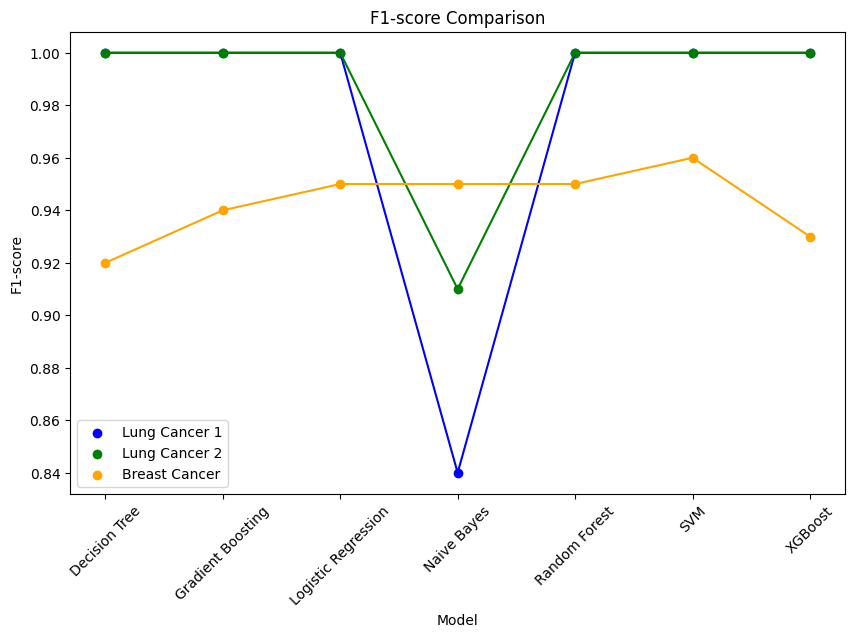

In [215]:
# Scatter plot for F1-score
plt.figure(figsize=(10, 6))
plt.scatter(df['Model'], df['Lung Cancer F1-score_1'], color='blue', label='Lung Cancer 1')
plt.scatter(df['Model'], df['Lung Cancer F1-score_2'], color='green', label='Lung Cancer 2')
plt.scatter(df['Model'], df['Breast Cancer F1-score'], color='orange', label='Breast Cancer')
plt.plot(df['Model'], df['Lung Cancer F1-score_1'], color='blue')
plt.plot(df['Model'], df['Lung Cancer F1-score_2'], color='green')
plt.plot(df['Model'], df['Breast Cancer F1-score'], color='orange')
plt.title('F1-score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.legend()
plt.show()